# First Exploration

## Introduction

In this notebook, a preliminary exploration of the dataset will be conducted to gain insights into the various variables it contains. The main objective is to understand what each variable describes, its significance, and the distributions of the data.

By examining the characteristics and relationships of the variables, a foundation will be established for more detailed analyses in subsequent steps. Visualizations and summary statistics will be utilized to illustrate the distribution patterns and identify any notable trends or anomalies within the dataset.

This exploration serves as a crucial first step in the data analysis process, allowing for informed decisions in later stages of modeling and interpretation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%run ../census_income/utils/pandas_explorer.py
%run ../census_income/utils/pandas_missing_handler.py

## Data load and first visualization:

In [2]:
path = '../census_income/data/adult.data'
data = pd.read_csv(path)
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Setting the column names:

In [3]:
columns_info = {
    'age': 'continuous',
    'workclass': 'Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked',
    'fnlwgt': 'continuous',
    'education': 'Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, doctorate, 5th-6th, Preschool',
    'education_num': 'continuous',
    'marital_status': 'Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse',
    'occupation':" Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, machine_op_inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces",
    'relationship': 'Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried',
    'race': 'White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black',
    'gender': 'Female, Male',
    'capital_gain': 'continuous',
    'capital_loss': 'continuous',
    'hours_per_week': 'continuous',
    'native_country': 'United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, dominican_Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands',
    'income':'<=50k,>50k'
}
data.columns = columns_info.keys()
data.to_csv('../census_income/data/cleaned_data.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Getting some basic information about the dataset:


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   gender          32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [5]:
print(data.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


## Looking for missing values:


In [6]:
data.missing.summary()

,nan,NA,N/A,n/a,N / A,n / a,/,-,*,,None
age,0,0,0,0,0,0,0,0,0,0,0
workclass,0,0,0,0,0,0,0,0,0,0,0
fnlwgt,0,0,0,0,0,0,0,0,0,0,0
education,0,0,0,0,0,0,0,0,0,0,0
education_num,0,0,0,0,0,0,0,0,0,0,0
marital_status,0,0,0,0,0,0,0,0,0,0,0
occupation,0,0,0,0,0,0,0,0,0,0,0
relationship,0,0,0,0,0,0,0,0,0,0,0
race,0,0,0,0,0,0,0,0,0,0,0
gender,0,0,0,0,0,0,0,0,0,0,0


- It look like the dataset doesn't have missing values.

## Exploring features one by one:


### Age:

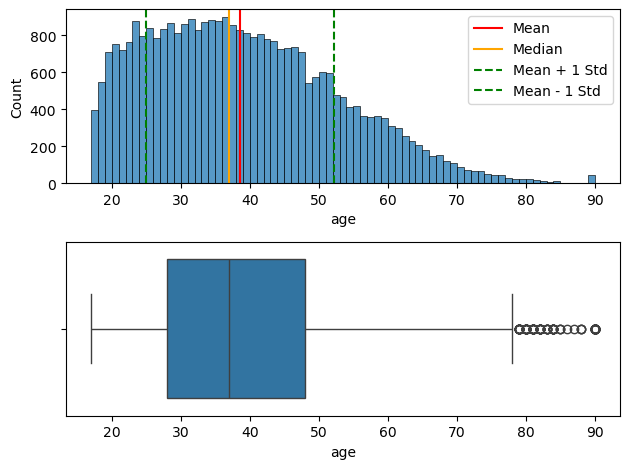

(None,
 age
 36    898
 31    888
 34    886
 23    877
 35    876
      ... 
 83      6
 88      3
 85      3
 86      1
 87      1
 Name: count, Length: 73, dtype: int64)

In [7]:

plt.tight_layout()
data.explorer.numerical_dist('age',data['age'].value_counts().count())

- The distribution has a positive skew with some outliers.

### WorkClass:

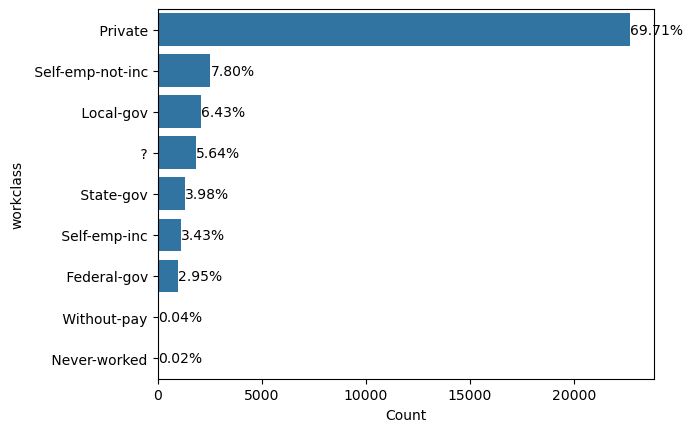

In [8]:
data.explorer.categorical_dist('workclass', orient='h')

- The number of records in the 'Private' class is much larger than in the others.
- There is a class labeled '?', and it is necessary to find out what it means.

### Fnlwgt:

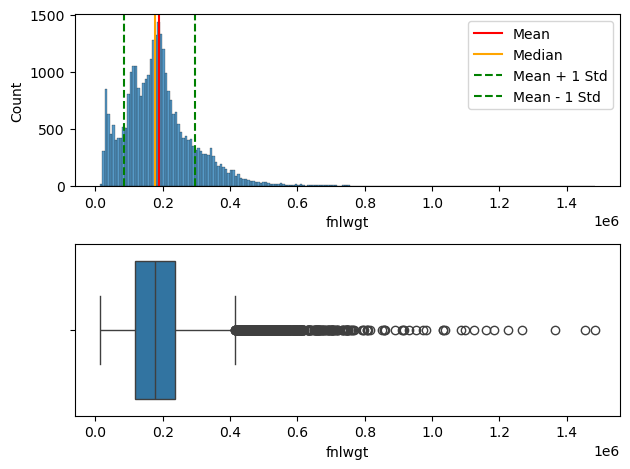

(None,
 fnlwgt
 164190    13
 203488    13
 123011    13
 148995    12
 126675    12
           ..
 325573     1
 140176     1
 318264     1
 329205     1
 257302     1
 Name: count, Length: 21647, dtype: int64)

In [9]:
data.explorer.numerical_dist('fnlwgt')

- The distribution exhibits a positive skew.
- The boxplot reveals many outliers on the positive side of the distribution.

### Education:

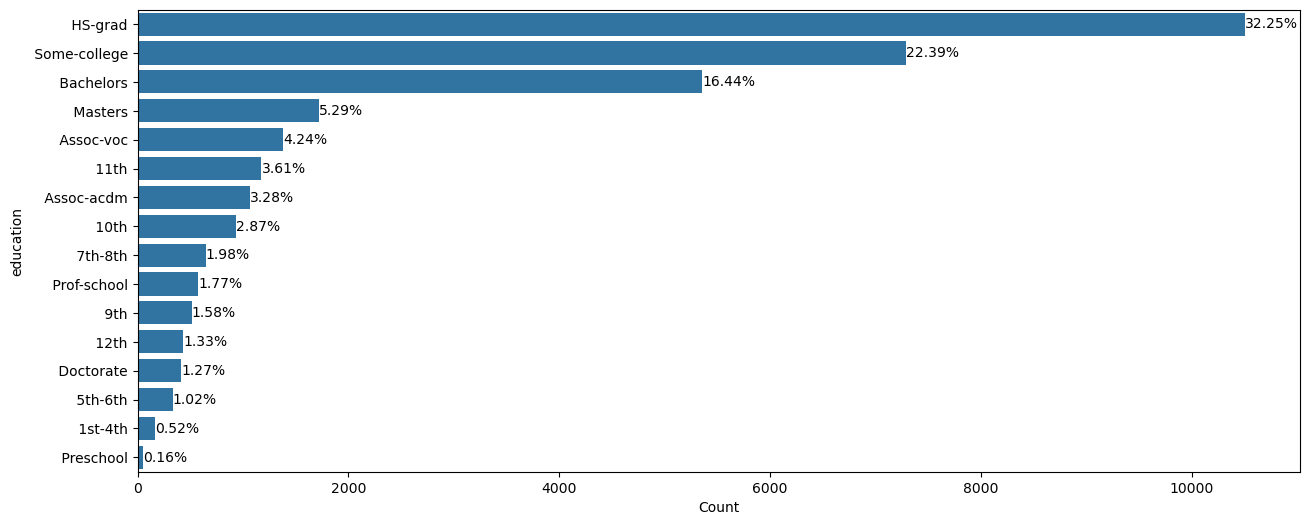

In [10]:
plt.figure(figsize=(15,6))
data.explorer.categorical_dist('education')

- The distribution shows a much larger number of records for the HS-grad, Some-college, and Bachelors classes.

### Education_num:

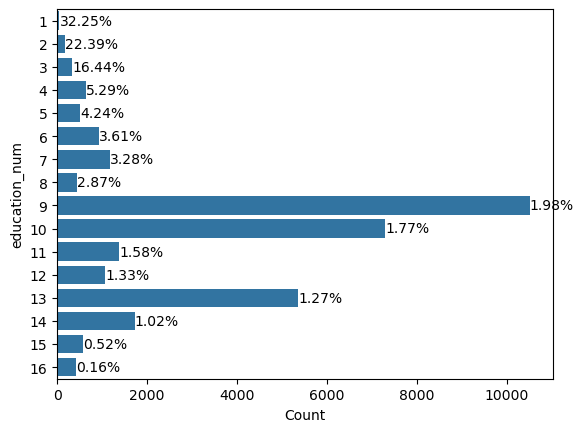

In [11]:
data.explorer.categorical_dist('education_num')

- The distribution shows a much larger amount of records for the 9,10, and 13 classes.

### Marital_status:

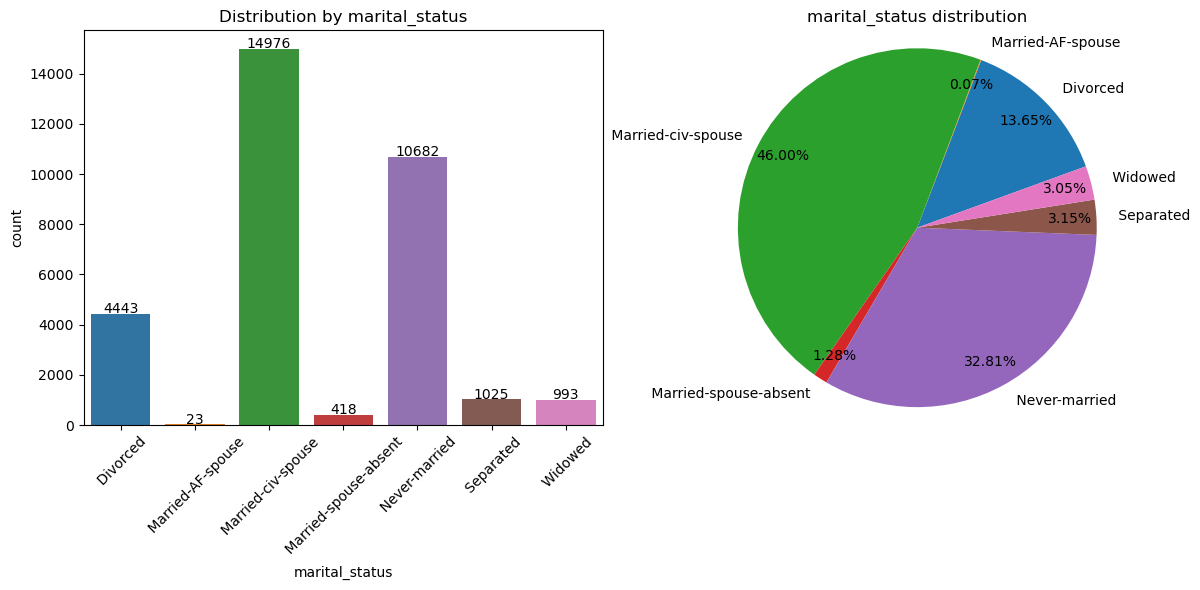

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
data.sort_values('marital_status', ascending=True).explorer.countplot_hue('marital_status',hue='marital_status', xtickrotation=45)
plt.title('Distribution by marital_status')

plt.subplot(1,2,2)
data.explorer.dist_pieplot('marital_status', strangle=20)
plt.show()

- The distribution shows a much larger number of records for the 'Married-civ-spouse' and 'Never-married' classes.


### Occupation:

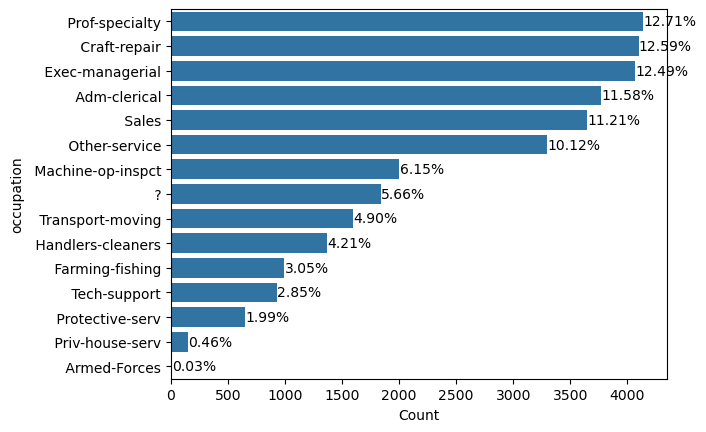

In [13]:
data.explorer.categorical_dist('occupation')

- This feature has a class labeled with '?'; it is necessary to find out what it means.

### Relationship:

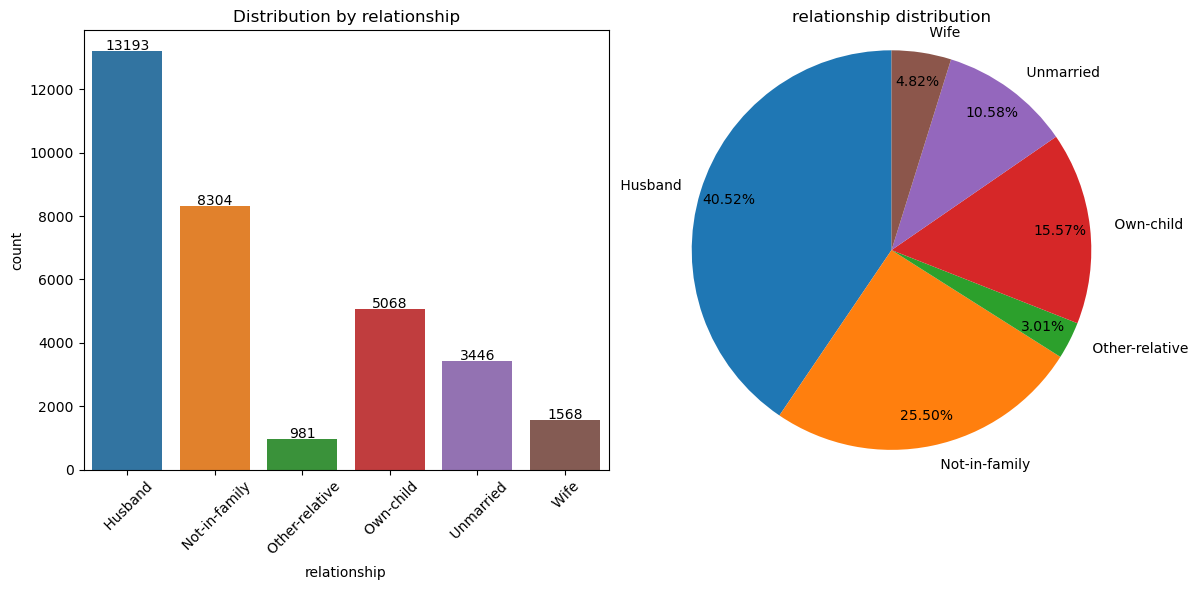

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
data.sort_values('relationship', ascending=True).explorer.countplot_hue('relationship',hue='relationship', xtickrotation=45)
plt.title('Distribution by relationship')

plt.subplot(1,2,2)
data.explorer.dist_pieplot('relationship')


- The distribution shows a larger amount of records for the 'Husband' class.

### Race:

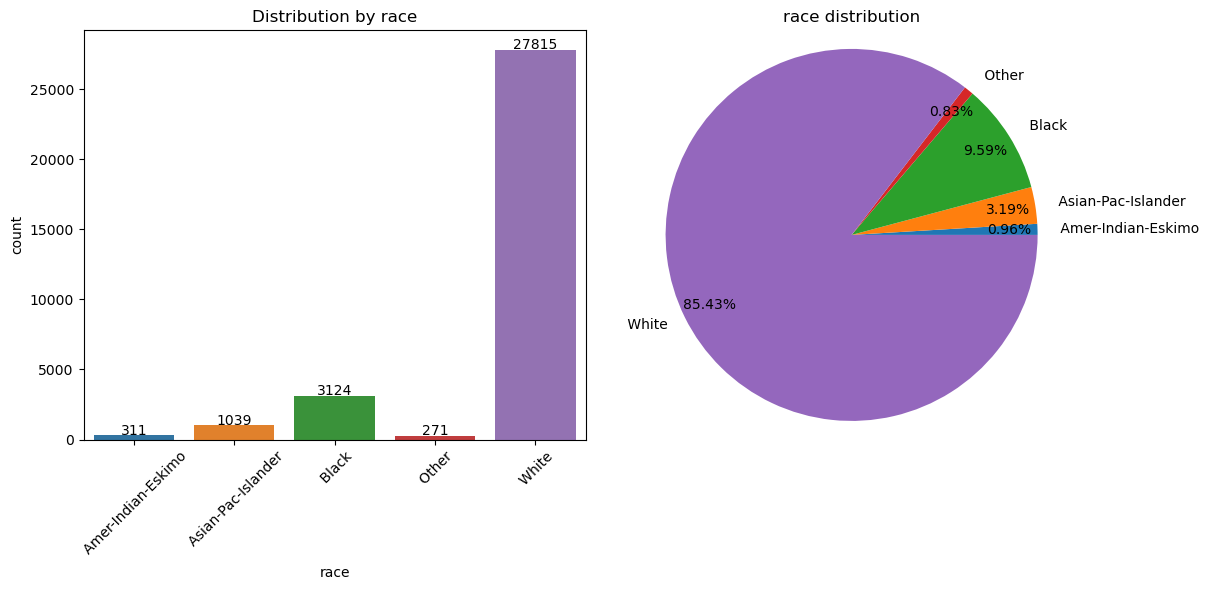

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
data.sort_values('race', ascending=True).explorer.countplot_hue('race',hue='race', xtickrotation=45)
plt.title('Distribution by race')

plt.subplot(1,2,2)
data.explorer.dist_pieplot('race', strangle = 0)


- The distriution shows a much larger amount of records for the 'White' class.

### Gender:

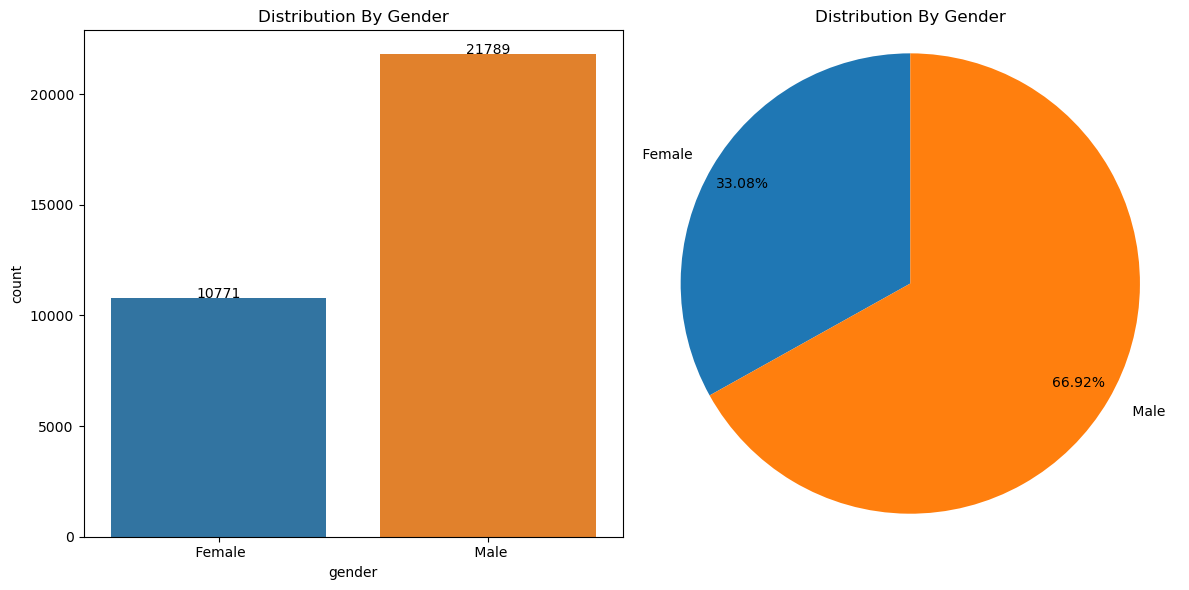

In [16]:
# Define the order of the classes
hue_order = ["Male", "Female"]

plt.figure(figsize=(12, 6))

# First subplot: Countplot (Bar chart)
plt.subplot(1, 2, 1)
data.sort_values('gender',ascending=True).explorer.countplot_hue('gender', hue='gender') 
plt.title('Distribution By Gender')

# Second subplot: Pie chart
plt.subplot(1, 2, 2)
data.explorer.dist_pieplot('gender')
plt.title('Distribution By Gender')

plt.show()


- The distribution shows that the number of records for the 'Male' class is more than double the number of records for the 'Female' class.

### Capital gain:

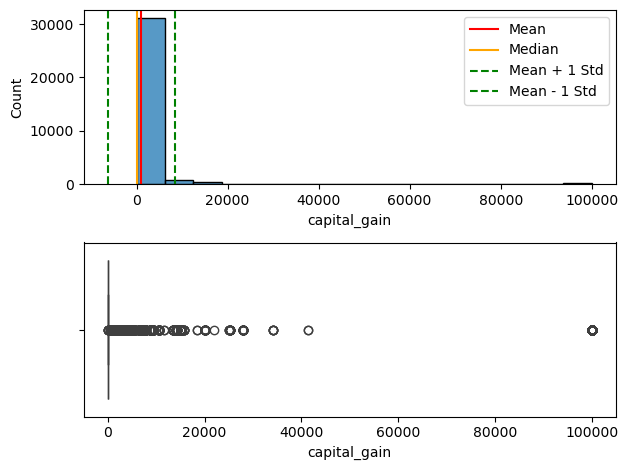

(None,
 capital_gain
 0        29849
 15024      347
 7688       284
 7298       246
 99999      159
          ...  
 1111         1
 2538         1
 22040        1
 4931         1
 5060         1
 Name: count, Length: 119, dtype: int64)

In [17]:
data.explorer.numerical_dist('capital_gain')

- The distribution shows 29849 records with a value of 0 for capital gain; it is necessary to find out what it means.

### Capital loss:

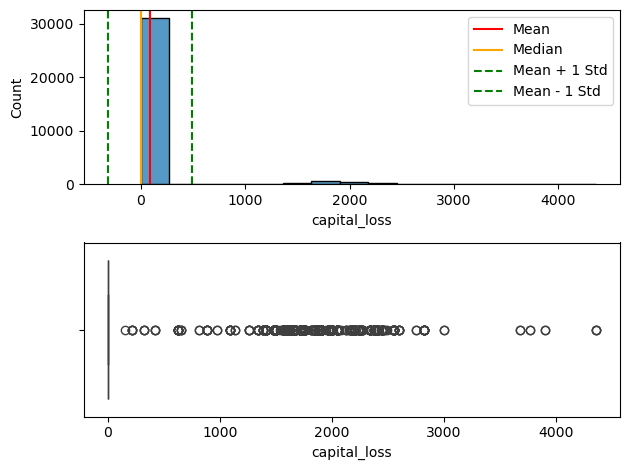

(None,
 capital_loss
 0       31041
 1902      202
 1977      168
 1887      159
 1848       51
         ...  
 2080        1
 1539        1
 1844        1
 2489        1
 1411        1
 Name: count, Length: 92, dtype: int64)

In [18]:
data.explorer.numerical_dist('capital_loss')

- The distribution shows 31041 records with a value of 0 for capital loss; it is necessary to find out what it means.

In [19]:
zero_gain_filt = data['capital_gain'] == 0
zero_loss_filt = data['capital_loss'] == 0

print(f'The amount of record wich have 0 gains and 0 losses is: {data[zero_gain_filt & zero_loss_filt].shape[0]}')

The amount of record wich have 0 gains and 0 losses is: 28330


- There are 28,330 records with 0 gains and 0 losses; it may make sense to think that these people don't engage in any kind of investments.

### Hours per week:

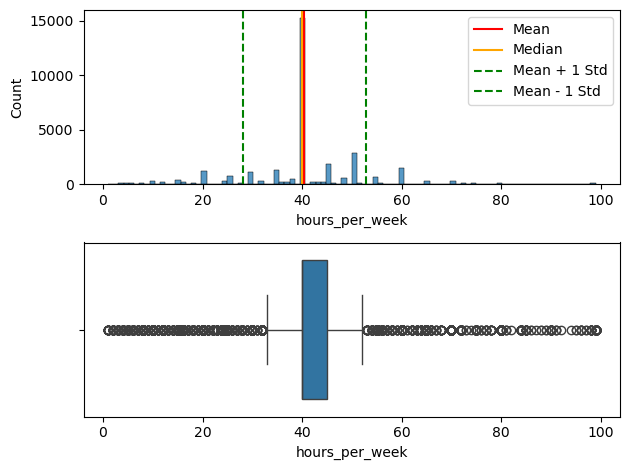

(None,
 hours_per_week
 40    15216
 50     2819
 45     1824
 60     1475
 35     1297
       ...  
 82        1
 94        1
 92        1
 74        1
 87        1
 Name: count, Length: 94, dtype: int64)

In [20]:
data.explorer.numerical_dist('hours_per_week',bins=data['hours_per_week'].value_counts().count())

- The distribution shows a concentration of records in the middle and numerous outliers on both sides.

### Native Country:

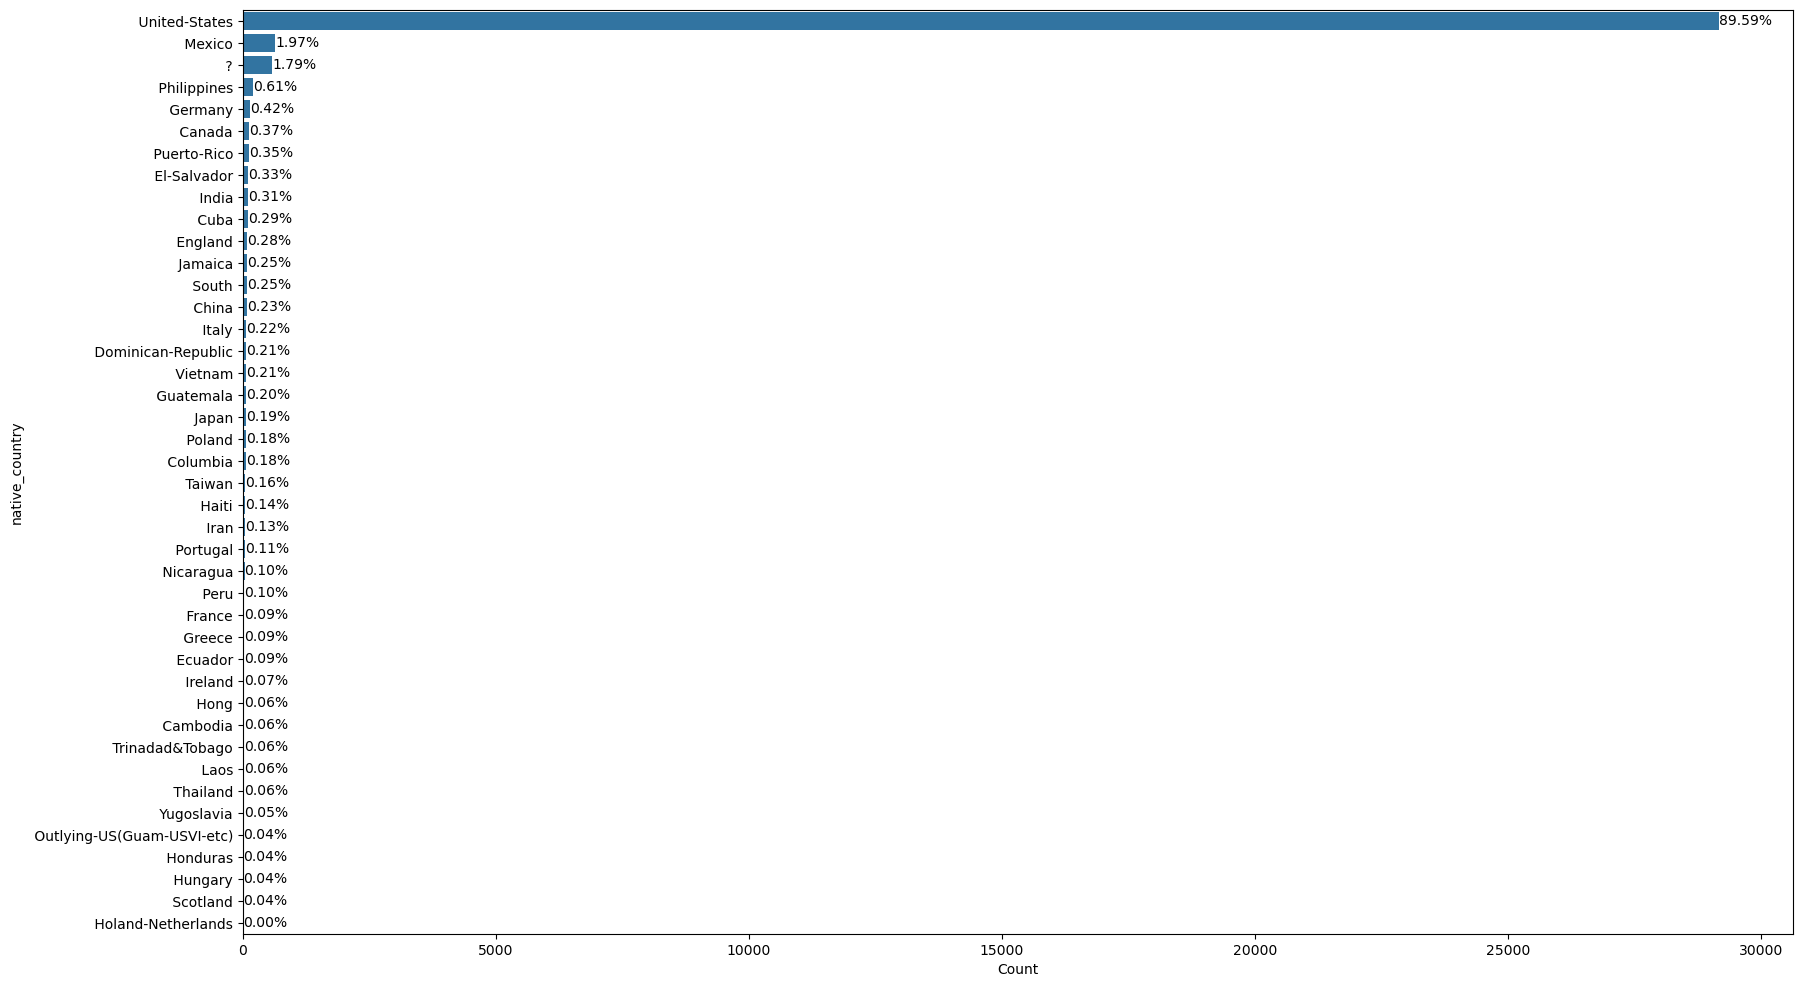

In [21]:
plt.figure(figsize=(20,12))
data.explorer.categorical_dist('native_country')

In [22]:
data['native_country'].value_counts()

native_country
United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

- The distribution shows a much larger amount of records for United-States wich is normal.
- The variale has a class labeled with '?' it is necessary to find out what it means.

### Income:

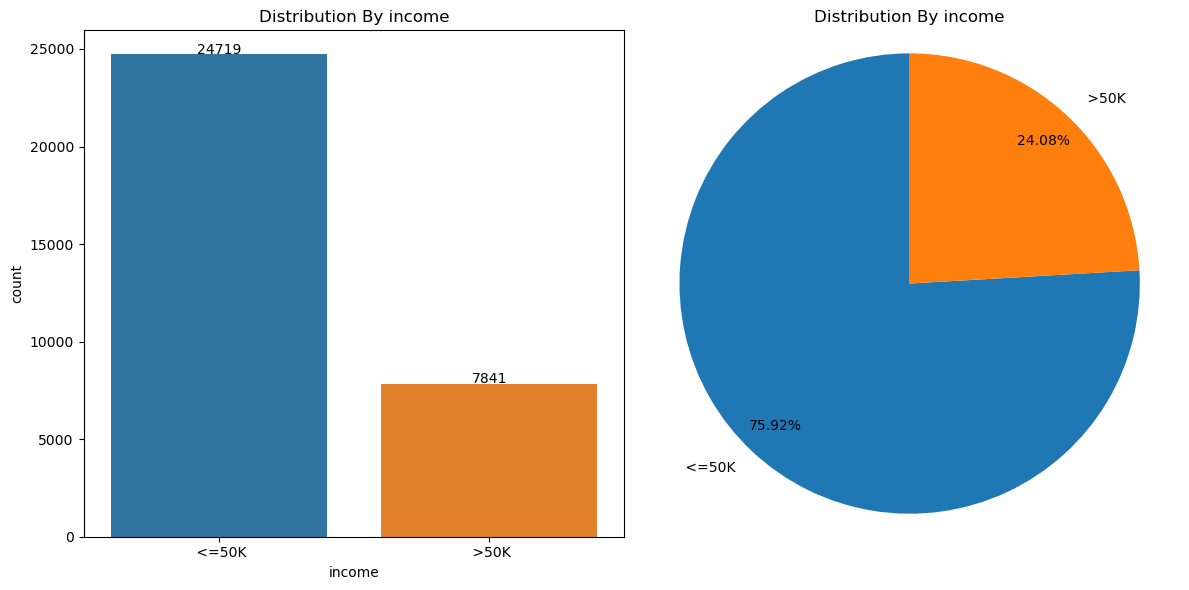

In [118]:
plt.figure(figsize=(12, 6))

# First subplot: Countplot (Bar chart)
plt.subplot(1, 2, 1)
data.sort_values('income',ascending=True).explorer.countplot_hue('income', hue='income') 
plt.title('Distribution By income')

# Second subplot: Pie chart
plt.subplot(1, 2, 2)
data.explorer.dist_pieplot('income')
plt.title('Distribution By income')

plt.show()

- The distribution shows a much larger number of records for the '<=50K' class.
- The distribution is unbalanced, which is not ideal for some machine learning algorithms.

In [24]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Conclusions

In this initial exploration of the dataset, several key insights have been gained regarding the variables and their distributions:

1. **Variable Understanding**: Each variable was examined to clarify its meaning and relevance within the context of the dataset. Notable relationships and potential implications were identified.

2. **Distribution Patterns**: The distributions of various variables revealed significant patterns, such as skewness, outliers, and concentrations of records in specific ranges. These observations are essential for understanding the data's characteristics.

3. **Data Quality**: Initial checks indicated areas for further investigation, including missing values or anomalies that may require attention before proceeding with more advanced analyses.

4. **Next Steps**: The findings from this exploration will inform subsequent modeling efforts. Potential relationships and patterns observed may guide feature selection and influence the choice of machine learning algorithms.
